In [13]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')


import pandas as pd
df = pd.DataFrame.from_csv('/srv/data-mining/data/Titanic/titanic.csv',index_col='PassengerId')
df




,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


We are missing data on the age of some passengers (e.g., Mr James Moran, PassengerId:6)
We are missing data on the Cabin people were booked in

I do not understand the values of SibSp, Parch and Embarked.

We could use information about the Cabin where people are staying in to determine wether somebody is crew of the Titanic

In [17]:
df.count(axis=0,level=None, numeric_only=False)
df.count(axis=1)

df['Fare']



PassengerId
1        7.2500
2       71.2833
3        7.9250
4       53.1000
5        8.0500
6        8.4583
7       51.8625
8       21.0750
9       11.1333
10      30.0708
11      16.7000
12      26.5500
13       8.0500
14      31.2750
15       7.8542
16      16.0000
17      29.1250
18      13.0000
19      18.0000
20       7.2250
21      26.0000
22      13.0000
23       8.0292
24      35.5000
25      21.0750
26      31.3875
27       7.2250
28     263.0000
29       7.8792
30       7.8958
         ...   
862     11.5000
863     25.9292
864     69.5500
865     13.0000
866     13.0000
867     13.8583
868     50.4958
869      9.5000
870     11.1333
871      7.8958
872     52.5542
873      5.0000
874      9.0000
875     24.0000
876      7.2250
877      9.8458
878      7.8958
879      7.8958
880     83.1583
881     26.0000
882      7.8958
883     10.5167
884     10.5000
885      7.0500
886     29.1250
887     13.0000
888     30.0000
889     23.4500
890     30.0000
891      7.7500
Name: Fare, 

In [ ]:
df[['Name', 'Fare']]

In [20]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [19]:
df.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

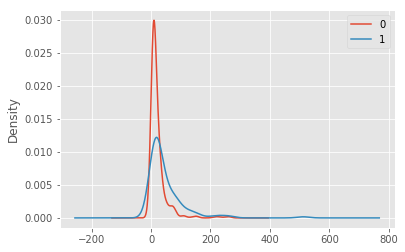

In [24]:
df.groupby('Survived')['Fare'].plot(kind='kde', legend=True)

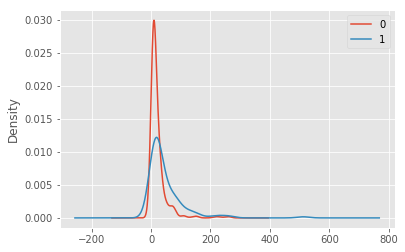

In [38]:
import matplotlib.pyplot as plt
df.groupby('Survived')['Fare'].plot(kind='kde', legend=True)
plt.style.use('ggplot')





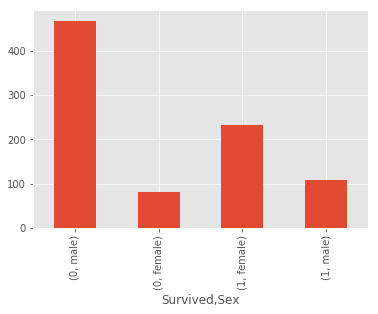

In [39]:
df.groupby('Survived')['Sex'].value_counts().plot(kind='Bar')


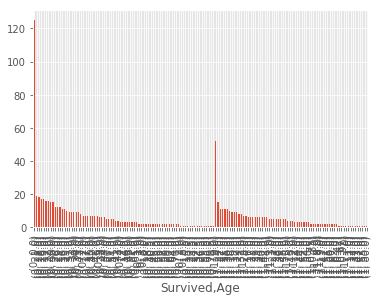

In [40]:
df['Age'] = df['Age'].fillna(0)
df.groupby('Survived')['Age'].value_counts().plot(kind='Bar')


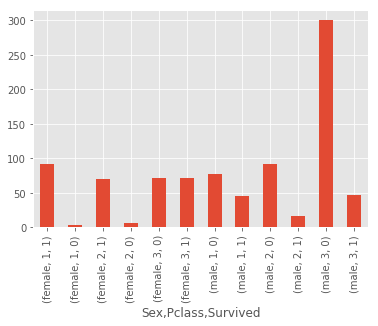

In [41]:
df.groupby(['Sex', 'Pclass'])['Survived'].value_counts().plot(kind='Bar')


Let's see which groups had noticeable high mortality rates
First, we examine the mortality rates for each Parch group. 

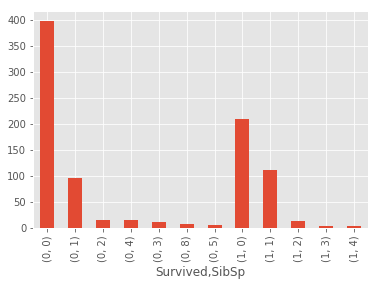

In [45]:
df.groupby('Survived')['SibSp'].value_counts().plot(kind='Bar')
#It seems that the number of spouses aboard seems to influence wether a person survived.
#Having more spouses onboard made you less likely to die during the qatastrofy.

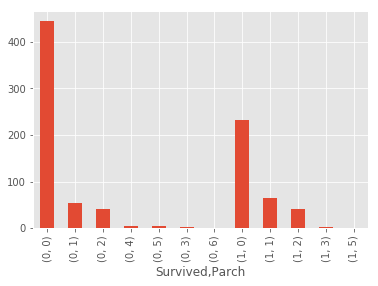

In [46]:
df.groupby('Survived')['Parch'].value_counts().plot(kind='Bar')
#This seems so be the same for the number of parents or children you had aboard. 

A likely explanation is the fact that woman and children (read=families) were allowed to leave the boat earlier than men